In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

In [27]:
file_path = "./input/genres_v2.csv"

df = pd.read_csv(file_path, low_memory=False)
df = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title', 'key', 'mode', 'time_signature'], axis=1)

df_y = df['genre']
df_x = df.drop(['genre'], axis=1)

# Underground Rap Drop
# df_y = df_y[df_y != 'Underground Rap']
# df_x = df_x.loc[df_y.index]

# Pop Drop
# df_y = df_y[df_y != 'Pop']
# df_x = df_x.loc[df_y.index]

label_encoder = LabelEncoder()

df_y_encoded = label_encoder.fit_transform(df_y)

original_labels = label_encoder.classes_

df_y = df_y_encoded

In [28]:
original_labels

array(['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal',
       'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse',
       'techno', 'trance', 'trap'], dtype=object)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, shuffle=True, random_state=1, stratify=df_y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=1, stratify=y_train)

In [30]:
def report(y_test, pred, label_encoder):
    '''
    accuracy, report, matrix
    '''
    print(f"accuracy score: {accuracy_score(y_test, pred)}")
    print(classification_report(y_test, pred))
    
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [31]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)
pred_val = model.predict(X_val)

accuracy score: 0.5717240360466834
              precision    recall  f1-score   support

           0       0.36      0.37      0.36       732
           1       0.54      0.53      0.53       269
           2       0.29      0.31      0.30       484
           3       0.12      0.12      0.12        74
           4       0.37      0.38      0.37       295
           5       0.27      0.29      0.28       336
           6       0.22      0.25      0.23       313
           7       0.34      0.30      0.32       940
           8       0.95      0.95      0.95       475
           9       0.82      0.80      0.81       470
          10       0.89      0.86      0.87       474
          11       0.84      0.84      0.84       476
          12       0.78      0.78      0.78       473
          13       0.73      0.75      0.74       480
          14       0.76      0.77      0.77       478

    accuracy                           0.57      6769
   macro avg       0.55      0.55      0.55  

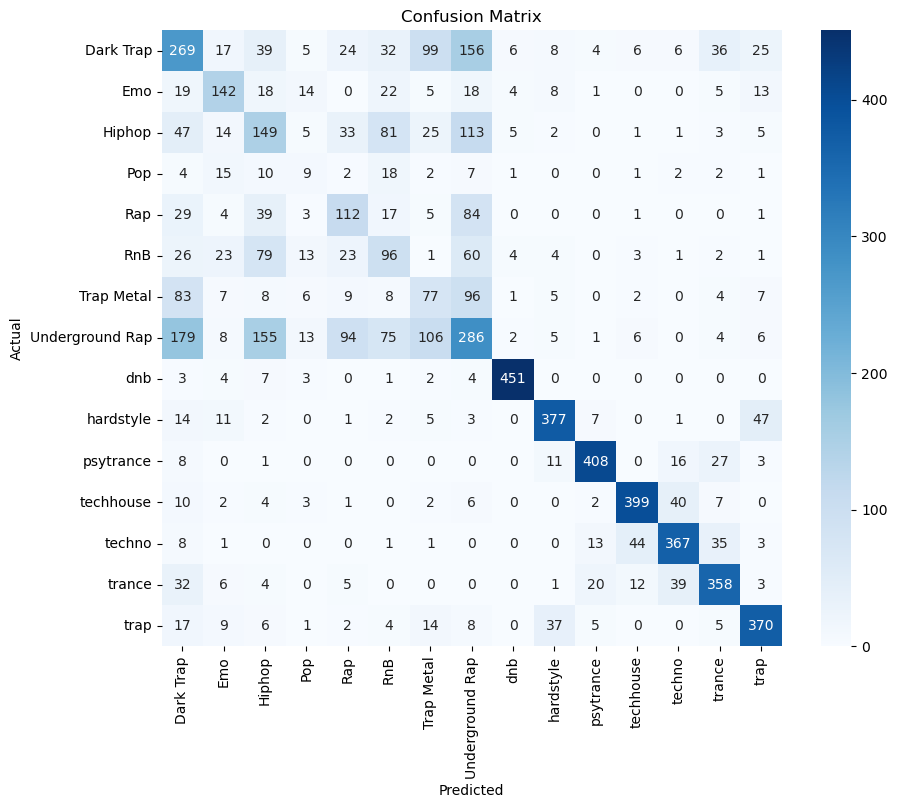

In [32]:
report(y_val, pred_val, label_encoder)

In [33]:
pred_test = model.predict(X_test)

accuracy score: 0.5636449592246779
              precision    recall  f1-score   support

           0       0.35      0.38      0.36       916
           1       0.50      0.51      0.51       336
           2       0.27      0.29      0.28       606
           3       0.08      0.09      0.09        92
           4       0.33      0.38      0.35       370
           5       0.26      0.28      0.27       420
           6       0.17      0.18      0.18       391
           7       0.31      0.26      0.28      1175
           8       0.96      0.95      0.95       593
           9       0.84      0.81      0.83       587
          10       0.89      0.86      0.88       592
          11       0.81      0.86      0.83       595
          12       0.76      0.77      0.77       591
          13       0.77      0.77      0.77       600
          14       0.78      0.77      0.77       597

    accuracy                           0.56      8461
   macro avg       0.54      0.54      0.54  

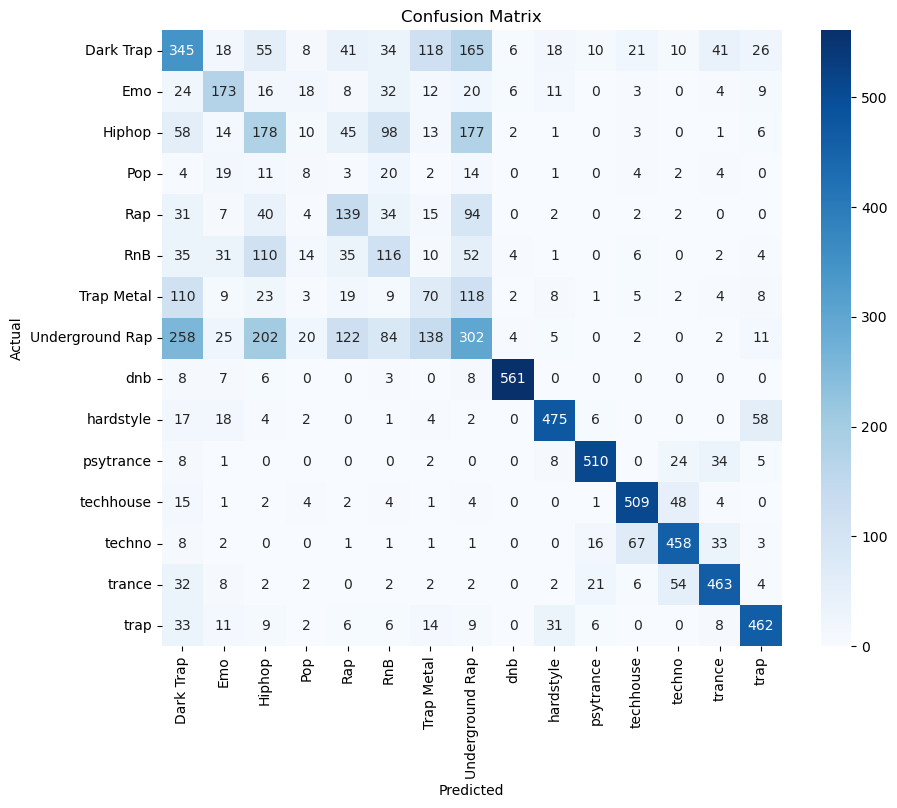

In [34]:
report(y_test, pred_test, label_encoder)